# Análisis de Series de Tiempo (TSA)

In [ ]:
!pip install quandl

You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
import quandl

In [ ]:
QUANDL_API_KEY = 'LphVrQ1zSEg9tztzWP49'
quandl.ApiConfig.api_key = QUANDL_API_KEY

In [ ]:
quandl.get("FRED/GDP")

,Value
Date,
1947-01-01,243.164
1947-04-01,245.968
1947-07-01,249.585
1947-10-01,259.745
1948-01-01,265.742
...,...
2020-10-01,21477.597
2021-01-01,22038.226
2021-04-01,22740.959


En particular, se buscó información de bienes raíces, específicamente se busca saber la cantidad de personas que obtuvieron un crédito después del problema del 2009. Se pueden buscar datos de diferente índole en: https://data.nasdaq.com/tools/python

In [ ]:
df_real = quandl.get("CHRIS/CME_GC1", column_index=6, collapse='weekly', start_date='2010-01-01')
df_real

,Settle
Date,
2010-01-10,1138.9
2010-01-17,1130.5
2010-01-24,1089.7
2010-01-31,1083.0
2010-02-07,1052.2
...,...
2021-06-06,1889.8
2021-06-13,1877.4
2021-06-20,1767.9


In [ ]:
df_real.resample('MS').ffill().dropna()

,Settle
Date,
2010-02-01,1083.0
2010-03-01,1118.9
2010-04-01,1104.3
2010-05-01,1153.1
2010-06-01,1212.2
...,...
2021-03-01,1731.6
2021-04-01,1734.7
2021-05-01,1777.8


**Ventanas de tiempo**

Las ventanas de tiempo o muestrales son muy útiles en el análisis de datos ya que nos permiten crear una serie de tiempo y ver como se ha comportado en el pasado la variable o estadístico que estamos estudiando 

La idea es crear una serie siempre con la misma cantidad de periodos de manera que veamos su evolución en el tiempo.

Por ejemplo nos sirve como una de las formas más simples para medir la variabilidad y la correlación que ha tenido un activo financiero o cualquier otra variable.

Fuente: https://ricovictor.com/index.php/2020/09/01/correlacion-y-covarianza-con-ventana-de-tiempo/

Creamos una ventana de tiempo de 3 semanas

In [ ]:
window = df_real.rolling(3)
df_real_mean = window.mean()

In [ ]:
import matplotlib.pyplot as plt

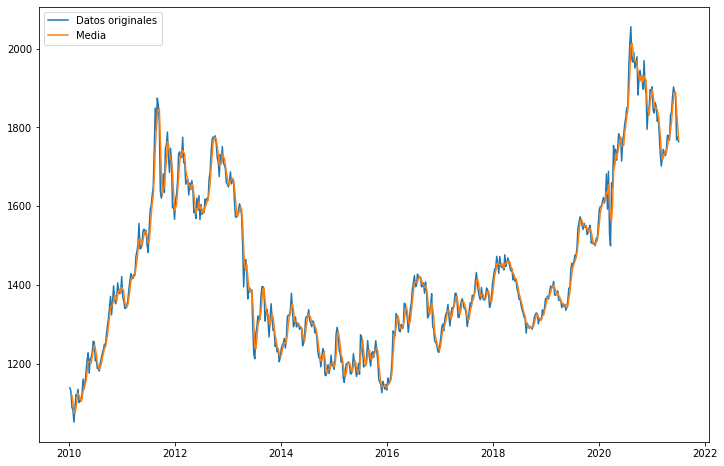

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(df_real, label = 'Datos originales')
plt.plot(df_real_mean, label = 'Media')
plt.legend()

Ahora veamos cómo hacer operaciones con las ventanas dinámicas y las series de tiempo

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

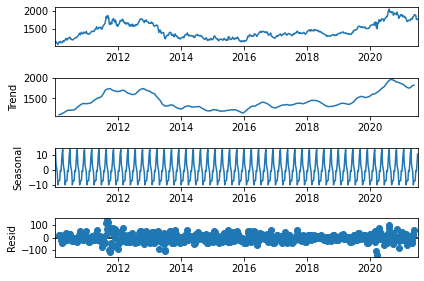

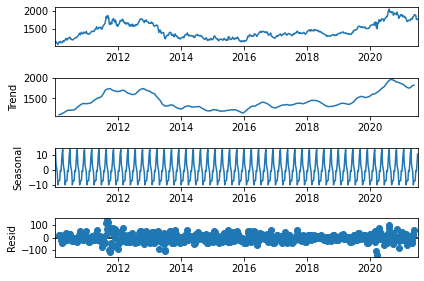

In [ ]:
season_analysis = seasonal_decompose(df_real, period=12)
season_analysis.plot()

# TSA con Open Power System Data



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
url = 'https://raw.githubusercontent.com/terranigmark/curso-analisis-exploratorio-datos-platzi/main/df_power.csv'

df_power = pd.read_csv(url,index_col=0)
df_power

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


In [ ]:
df_power.columns

Index(['Date', 'Consumption', 'Wind', 'Solar', 'Wind+Solar'], dtype='object')

In [ ]:
df_power['Date'] = pd.to_datetime(df_power['Date'])

In [ ]:
df_power.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 334.5 KB


In [ ]:
df_power = df_power.set_index('Date')
df_power

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18400,NaN,NaN,NaN
2006-01-02,1380.52100,NaN,NaN,NaN
2006-01-03,1442.53300,NaN,NaN,NaN
2006-01-04,1457.21700,NaN,NaN,NaN
2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037
2017-12-28,1299.86398,506.424,14.162,520.586
2017-12-29,1295.08753,584.277,29.854,614.131


In [ ]:
df_power['Year'] = df_power.index.year
df_power['Month'] = df_power.index.month
df_power['Day'] = df_power.index.day_name()
df_power

,Consumption,Wind,Solar,Wind+Solar,Year,Month,Day
Date,,,,,,,
2006-01-01,1069.18400,NaN,NaN,NaN,2006,1,Sunday
2006-01-02,1380.52100,NaN,NaN,NaN,2006,1,Monday
2006-01-03,1442.53300,NaN,NaN,NaN,2006,1,Tuesday
2006-01-04,1457.21700,NaN,NaN,NaN,2006,1,Wednesday
2006-01-05,1477.13100,NaN,NaN,NaN,2006,1,Thursday
...,...,...,...,...,...,...,...
2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Wednesday
2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Thursday
2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Friday


<AxesSubplot:xlabel='Date'>

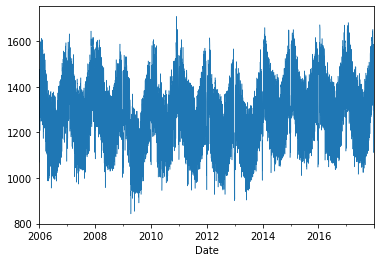

In [ ]:
df_power['Consumption'].plot(linewidth=0.5n)

array([<AxesSubplot:xlabel='Date'>, <AxesSubplot:xlabel='Date'>,
       <AxesSubplot:xlabel='Date'>], dtype=object)

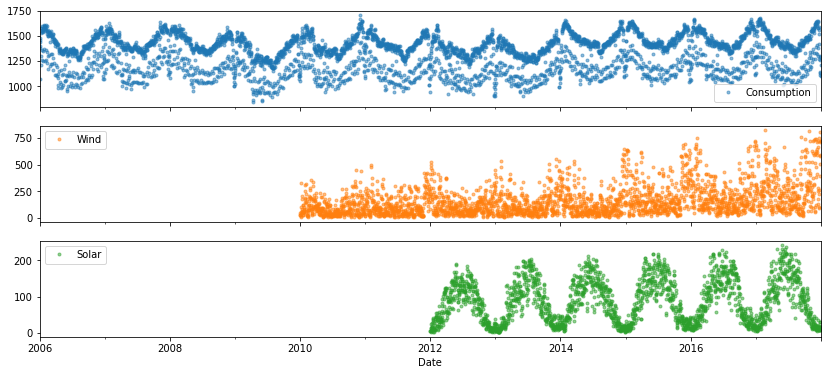

In [ ]:
name = ['Consumption', 'Wind', 'Solar']
df_power[name].plot(marker='.', alpha=0.5, linestyle='None', figsize=(14,6), subplots=True)

<AxesSubplot:xlabel='Date'>

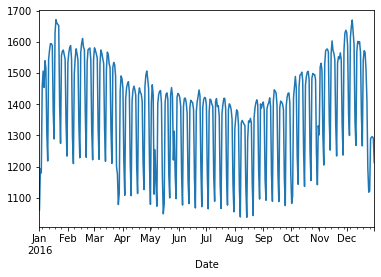

In [ ]:
df_power.loc['2016', 'Consumption'].plot()

<AxesSubplot:xlabel='Date'>

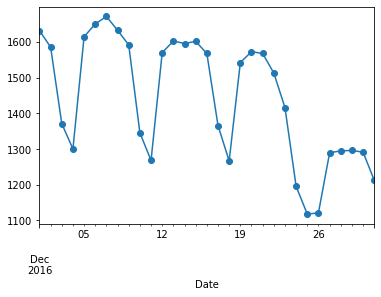

In [ ]:
df_power.loc['2016-12', 'Consumption'].plot(marker='o')

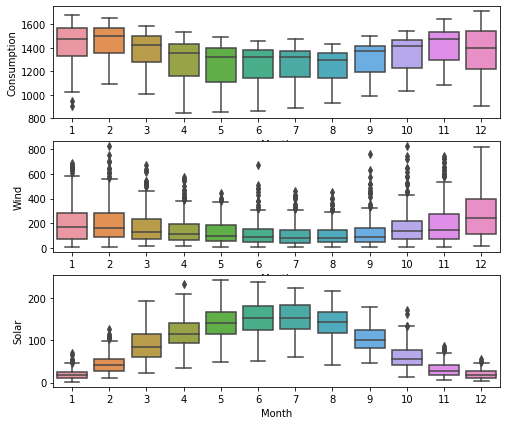

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(8,7))
for i, ax in zip(name, ax):
    sns.boxplot(data=df_power, x='Month', y=i, ax=ax)

Haciendo un análisis de la gráfica anterior, podemos ver que la producción de energía solar es mayor en verano, mientras que el consumo de energía eléctrica disminuye en esos mismos meses. Por su parte, la producción anual de energía eólica se mantiene constante, habiendo un pequeño aumento en los últimos 3 meses del año.

# Desarrollo de evaluación de modelos

Imagina que ya estás en un proyecto de Data Science y tu quieres comprobar algo. Por ejemplo: ¿En que momento va a renunciar un empleado de la empresa?

Debes plantear una hipótesis inicial, a esta le llamaremos “Hipótesis Nula” y algo que lo contratidga le llamaremos “Hipótesis alternativa”. Y a tu Hipótesis Nula la pondremos a prueba con una “Prueba de Hipótesis”, la cual debes elegir sabiamente.
La prueba de hipótesis la debemos elegir es en base a la forma en la que están distribuidos nuestros datos, tipos de medición , tipos de datos o características. Las pruebas pueden ser:

- Anova
- Z-test
- T-test
- Chi-squared test

Cuando ya hallas elegido tu prueba de hipótesis, tendrás un P-Value que te dirá si tu hipótesis se acepta o se rechaza, en base a su ubicación en la campana.

**p-value**

El valor-p ayuda a diferenciar resultados que son producto del azar del muestreo, de resultados que son estadísticamente significativos.


![Picture title](image-20220420-014436.png)

**Prueba de modelos**

Si quieres comprobar si un modelo funciona de la manera correcta, entrénalo con un conjunto de datos de entrenamiento (se recomienda que contenga un 80% de los datos totales) y evalúa el rendimiento de tu modelo con el 20% de datos restantes.

Una vez hallas evaluado tu modelo con el los conjuntos de datos de entrenamiento y de testing (80 y 20) puedes usar una matriz de confusión, esto te dirá todos los aciertos de tu modelo.

Una vez termines de ver tu Matriz de confusión, podrás ver que tan preciso o exacto es tu modelo

![Picture title](image-20220420-014632.png)

**Ejemplo**

1. Entrenas el modelo
2. Evaluación del modelo


![Picture title](image-20220420-014718.png)

![Picture title](image-20220420-014833.png)

# Regresión y evaluación de hipótesis

Existen varios tipos de regresiones:
- Neural Network Regression
- Neural Network Regression
- Decision Tree Regression
- Ridge Regression
- ElasticNet Regression

In [ ]:
import pandas as pd
from sklearn import datasets
import numpy as np

In [ ]:
iris = datasets.load_iris()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [ ]:
df = pd.DataFrame(iris.data)
df.columns = iris.feature_names
df['Target'] = iris.target  # clasificacion de las flores
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
df['Target_name'] = df['Target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target,Target_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target = ['Target', 'Target_name']
# Lista de descriptores
desc = list(set(list(df.columns)) - set(target))  # Quitamos las columnas de target
desc

['petal width (cm)',
 'sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)']

In [ ]:
X = df[desc].values
y = df['Target'].values
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.30, random_state=40)

# Métricas de evaluación y regresión

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
reg_1 = DecisionTreeRegressor(max_depth=4)
reg_1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4)

In [ ]:
predict_train = reg_1.predict(X_train)
predict_test = reg_1.predict(X_test)

Realizando una matriz de confusión

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

In [ ]:
print(classification_report(y_test, predict_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        15

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [ ]:
print(confusion_matrix(y_test, predict_test))

[[16  0  0]
 [ 0 14  0]
 [ 0  0 15]]


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=27dabb8f-c014-4c3b-9af9-2c50accbfcce' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>